In [2]:
install.packages("OneR")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [3]:
library("OneR")

In [4]:
set.seed(12)

In [5]:
breastcancer

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
5,1,1,1,2,1,3,1,1,benign
5,4,4,5,7,10,3,2,1,benign
3,1,1,1,2,2,3,1,1,benign
6,8,8,1,3,4,3,7,1,benign
4,1,1,3,2,1,3,1,1,benign
8,10,10,8,7,10,9,7,1,malignant
1,1,1,1,2,10,3,1,1,benign
2,1,2,1,2,1,3,1,1,benign
2,1,1,1,2,1,1,1,5,benign


In [6]:
random <- sample(1:nrow(breastcancer), 0.7 * nrow(breastcancer))

In [7]:
breastcancer_train <- optbin(breastcancer[random, ], method = "infogain")

Warning message in optbin.data.frame(breastcancer[random, ], method = "infogain"):
“11 instance(s) removed due to missing values”

In [8]:
breastcancer_test <- breastcancer[random, ]

In [9]:
model_train_breastcancer <- OneR(breastcancer_train, verbose = TRUE)


    Attribute                   Accuracy
1 * Uniformity of Cell Size     92.47%  
2   Uniformity of Cell Shape    91.21%  
3   Bare Nuclei                 90.79%  
4   Single Epithelial Cell Size 89.33%  
4   Bland Chromatin             89.33%  
4   Normal Nucleoli             89.33%  
7   Marginal Adhesion           85.36%  
8   Clump Thickness             82.85%  
9   Mitoses                     76.99%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



In [10]:
summary(model_train_breastcancer)


Call:
OneR.data.frame(x = breastcancer_train, verbose = TRUE)

Rules:
If Uniformity of Cell Size = (0.991,3] then Class = benign
If Uniformity of Cell Size = (3,10]    then Class = malignant

Accuracy:
442 of 478 instances classified correctly (92.47%)

Contingency table:
           Uniformity of Cell Size
Class       (0.991,3] (3,10] Sum
  benign        * 290      7 297
  malignant        29  * 152 181
  Sum             319    159 478
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 333.84, df = 1, p-value < 2.2e-16



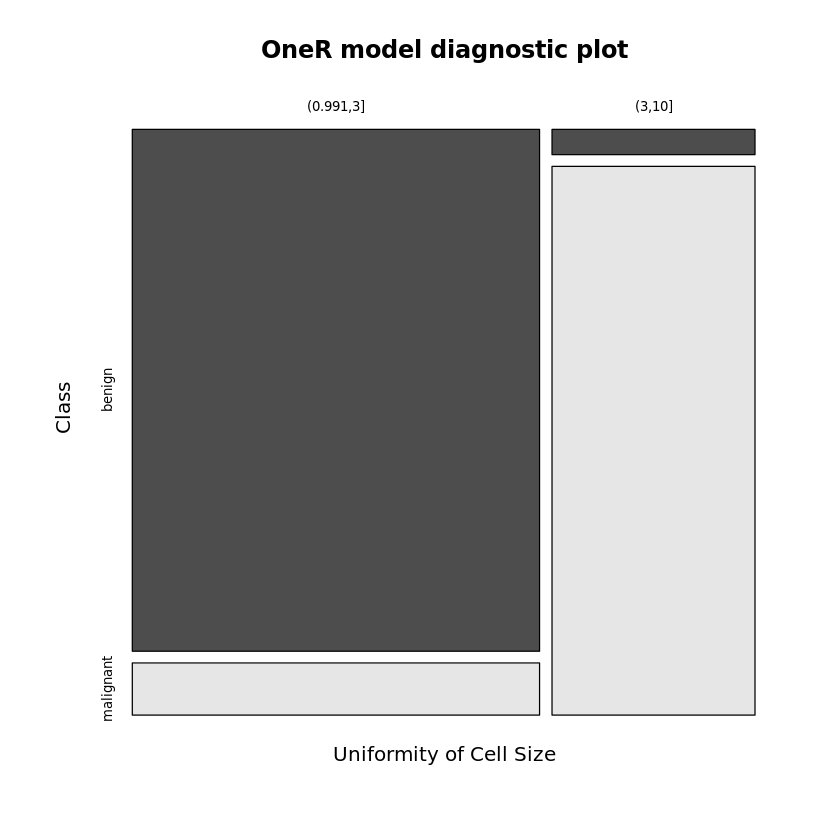

In [11]:
plot(model_train_breastcancer)

In [12]:
prediction <- predict(model_train_breastcancer, breastcancer_test)

In [13]:
eval_model(prediction, breastcancer_test)


Confusion matrix (absolute):
           Actual
Prediction  benign malignant Sum
  benign       296        29 325
  malignant     10       154 164
  Sum          306       183 489

Confusion matrix (relative):
           Actual
Prediction  benign malignant  Sum
  benign      0.61      0.06 0.66
  malignant   0.02      0.31 0.34
  Sum         0.63      0.37 1.00

Accuracy:
0.9202 (450/489)

Error rate:
0.0798 (39/489)

Error rate reduction (vs. base rate):
0.7869 (p-value < 2.2e-16)



In [14]:
install.packages("e1071")
install.packages("naivebayes")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [15]:
library(e1071)
library(naivebayes)

In [16]:
naive_train_cancer <- breastcancer[random, ]

In [17]:
naive_test_cancer <- breastcancer[-random, ]

In [18]:
breast_naive <- naiveBayes(Class ~ ., data=naive_train_cancer)

ERROR: Error in `[.data.frame`(m, , attr(Terms, "term.labels"), drop = FALSE): undefined columns selected
